## Updates the Database table by creating a new one and replaing the old one

#### Connects to DB and downloads any new data set that has been released
*Depending on the size and amount of files that need to be downloaded, this process might take some time.*

In [1]:
# Open database connection
!pip install pymysql
!pip install SQLAlchemy
import pymysql
import pandas as pd

import zipfile
import requests
# import numpy
# import pandas as pd
import os
import pickle
# from io import BytesIO
# from zipfile import ZipFile
from urllib.request import urlopen
from bs4 import BeautifulSoup

## Connect to database on aws
host = 'census-survey.cyrsav06mrxh.us-east-1.rds.amazonaws.com'
port = '3306'
user = 'team'
password = 'capstone'
database = 'Census_survey'

db = pymysql.connect(
    host=host,
    port=int(3306),
    user=user,
    passwd=password,
    database=database,
    charset='utf8mb4',
    local_infile=True)

db_cursor = db.cursor()

# Create directories for storage (When using colab uncomment code below)
#from google.colab import drive 
#drive.mount('drive')

# Change the following paths to match with your pc
dirpath = r'C:\Users\wolde\Documents\Capstone' # Change to desired directory
listpath = r'C:\Users\wolde\Documents\Capstone\curr_list.txt' # List of links
if not os.path.exists(dirpath): # If directory does not exist yet, make it
    os.makedirs(dirpath)

# If list does not exist yet, make it
try:
    with open(listpath, 'rb') as f:
        curr_List = pickle.load(f)
except IOError:
    curr_List = []

print(curr_List)

# Open website
url = "https://www.census.gov/programs-surveys/household-pulse-survey/datasets.html"   
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

# Identify url links of required zip files
zipfile_urls = soup.select("a[href$='CSV.zip']")
links = [link.get('href') for link in zipfile_urls]
zipLinks = ["http:" + s for s in links]

# Get difference between website list and current list
diff = list(set(zipLinks) - set(curr_List))

print(diff)
# Extract necessary zip content to directory
import io
for i in diff:
    r = requests.get(i)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(dirpath)

# Update current list of zip files and store in txt file
new_List = zipLinks
with open(listpath, 'wb') as f:
    pickle.dump(new_List, f)

['http://www2.census.gov/programs-surveys/demo/datasets/hhp/2021/wk39/HPS_Week39_PUF_CSV.zip', 'http://www2.census.gov/programs-surveys/demo/datasets/hhp/2021/wk38/HPS_Week38_PUF_CSV.zip', 'http://www2.census.gov/programs-surveys/demo/datasets/hhp/2021/wk37/HPS_Week37_PUF_CSV.zip', 'http://www2.census.gov/programs-surveys/demo/datasets/hhp/2021/wk36/HPS_Week36_PUF_CSV.zip', 'http://www2.census.gov/programs-surveys/demo/datasets/hhp/2021/wk35/HPS_Week35_PUF_CSV.zip', 'http://www2.census.gov/programs-surveys/demo/datasets/hhp/2021/wk34/HPS_Week34_PUF_CSV.zip', 'http://www2.census.gov/programs-surveys/demo/datasets/hhp/2021/wk33/HPS_Week33_PUF_CSV.zip', 'http://www2.census.gov/programs-surveys/demo/datasets/hhp/2021/wk32/HPS_Week32_PUF_CSV.zip', 'http://www2.census.gov/programs-surveys/demo/datasets/hhp/2021/wk31/HPS_Week31_PUF_CSV.zip', 'http://www2.census.gov/programs-surveys/demo/datasets/hhp/2021/wk30/HPS_Week30_PUF_CSV.zip', 'http://www2.census.gov/programs-surveys/demo/datasets/hhp/

## Combine all the Census CSV files including the new ones into one large CSV file

*Once again, this process might take time due to the size of the files we are working with.*  

In [ ]:
# import numpy
import os
# from io import BytesIO
# from zipfile import ZipFile
import glob
import pandas as pd
import datetime
import fnmatch
import csv
from datetime import datetime, timedelta
dirpath = r'C:\Users\wolde\Documents\Capstone' # Change to desired directory
os.chdir(dirpath)
csv_list = []
# Convert current time to seconds
currDate = datetime.today() 
currSec = currDate.timestamp()
# For each csv file in directory containing raw data  
for file_name in glob.glob(os.path.join(dirpath, '*.csv')):
    if fnmatch.fnmatch(file_name, '*puf*') and not "repwgt" in file_name:
        # Get time the file was modified
        fileSec = os.path.getmtime(file_name)
        diffTime = currSec - fileSec
        # If file was modified within last 24 hours
        if diffTime <= 86400:
            print(file_name)
        # Add file name to list of csv files
        csv_list.append(file_name)

# If directory does not exist yet, make it
comPath = r'C:\Users\wolde\Documents\Capstone\Combined' # Change to desired directory
if not os.path.exists(comPath): 
     os.makedirs(comPath)

# If the dataset for each phase does not exist, make it and store into dataframe
from itertools import chain
os.chdir(comPath)
comb1 = r'C:\Users\wolde\Documents\Capstone\Combined\combined_new.csv' # Change to appropiate file path

# Inside csv_list[], make sure to have a [0: max week # - 1]
if not os.path.exists(comb1):
    csv_new = list(chain(csv_list[0:11]))
    combined_csv = pd.concat([pd.read_csv(f) for f in csv_new ])
    combined_csv.to_csv( "combined_new.csv", index=False, encoding='utf-8-sig')

### **This would require some manual input**

#### Once the previous chuck has been ran, the combined_new CSV file would have been downloaded.

- **Visit https://www.rebasedata.com/convert-csv-to-mysql-online** **and upload a single CSV file**

This will generate and a MySQL file that contains a script to create a table for the data which includes the new csv files that we are updating. *Depending on the size of the file, it might take some time*. 

- Download the Generated SQL Script and open it on any avaiable software, for our examples below, we used MySQL Workbench 
- Next, inside the script, right click on "create table" text on the script, select "text", then select "Quote and Escape String", this would allow the following portion of the script to be converted into a copiable string as shown in the second picture below. 

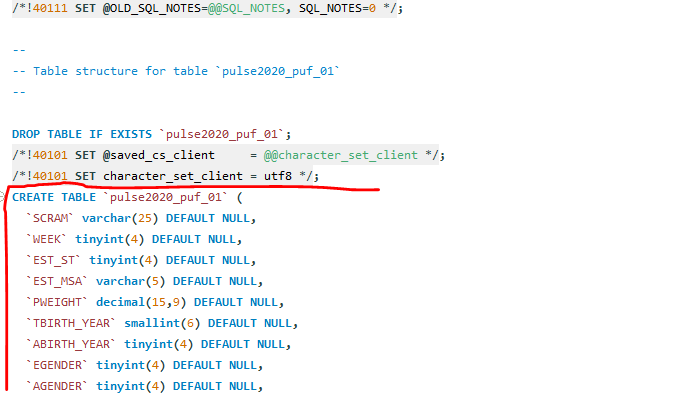
### ...

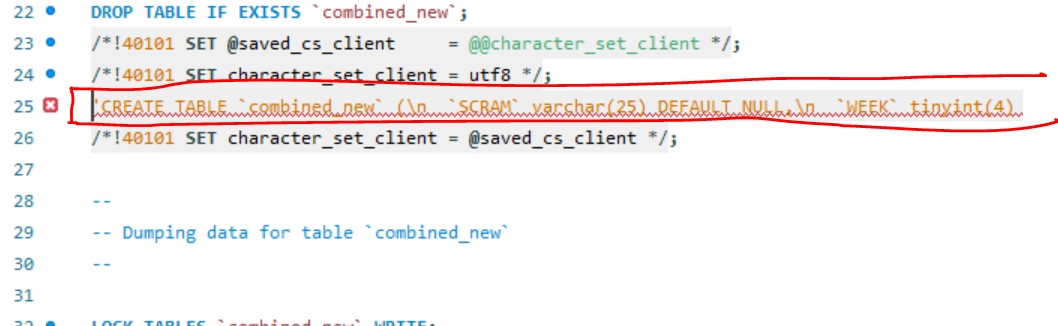

**Copy the entire string within the red box as shown above and paste it in the specfied location in the code block below.**  


#### **We will now create a new table**

In [ ]:
# Change the name of the old table (Insert the "survey_data as the name to be altered")
db_cursor.execute('ALTER TABLE new_Data RENAME TO old_Data')

# Make a new table (# PASTE THE COPIED STRING WITH in execute())
db_cursor.execute('CREATE TABLE `combined_new` (\n  `﻿SCRAM` varchar(25) DEFAULT NULL,\n  `WEEK` tinyint(4) DEFAULT NULL,\n  `EST_ST` tinyint(4) DEFAULT NULL,\n  `EST_MSA` varchar(7) DEFAULT NULL,\n  `PWEIGHT` decimal(16,10) DEFAULT NULL,\n  `TBIRTH_YEAR` smallint(6) DEFAULT NULL,\n  `ABIRTH_YEAR` tinyint(4) DEFAULT NULL,\n  `EGENDER` tinyint(4) DEFAULT NULL,\n  `AGENDER` tinyint(4) DEFAULT NULL,\n  `RHISPANIC` tinyint(4) DEFAULT NULL,\n  `AHISPANIC` tinyint(4) DEFAULT NULL,\n  `RRACE` tinyint(4) DEFAULT NULL,\n  `ARACE` tinyint(4) DEFAULT NULL,\n  `EEDUC` tinyint(4) DEFAULT NULL,\n  `AEDUC` tinyint(4) DEFAULT NULL,\n  `MS` smallint(6) DEFAULT NULL,\n  `THHLD_NUMPER` tinyint(4) DEFAULT NULL,\n  `AHHLD_NUMPER` tinyint(4) DEFAULT NULL,\n  `THHLD_NUMKID` tinyint(4) DEFAULT NULL,\n  `AHHLD_NUMKID` tinyint(4) DEFAULT NULL,\n  `THHLD_NUMADLT` tinyint(4) DEFAULT NULL,\n  `WRKLOSS` smallint(6) DEFAULT NULL,\n  `EXPCTLOSS` smallint(6) DEFAULT NULL,\n  `ANYWORK` smallint(6) DEFAULT NULL,\n  `KINDWORK` smallint(6) DEFAULT NULL,\n  `RSNNOWRK` smallint(6) DEFAULT NULL,\n  `UNEMPPAY` smallint(6) DEFAULT NULL,\n  `PRIFOODSUF` smallint(6) DEFAULT NULL,\n  `CURFOODSUF` smallint(6) DEFAULT NULL,\n  `FOODSUFRSN1` smallint(6) DEFAULT NULL,\n  `FOODSUFRSN2` smallint(6) DEFAULT NULL,\n  `FOODSUFRSN3` smallint(6) DEFAULT NULL,\n  `FOODSUFRSN4` smallint(6) DEFAULT NULL,\n  `FOODSUFRSN5` smallint(6) DEFAULT NULL,\n  `FREEFOOD` smallint(6) DEFAULT NULL,\n  `WHEREFREE1` smallint(6) DEFAULT NULL,\n  `WHEREFREE2` smallint(6) DEFAULT NULL,\n  `WHEREFREE3` smallint(6) DEFAULT NULL,\n  `WHEREFREE4` smallint(6) DEFAULT NULL,\n  `WHEREFREE5` smallint(6) DEFAULT NULL,\n  `WHEREFREE6` smallint(6) DEFAULT NULL,\n  `WHEREFREE7` smallint(6) DEFAULT NULL,\n  `TSPNDFOOD` smallint(6) DEFAULT NULL,\n  `TSPNDPRPD` smallint(6) DEFAULT NULL,\n  `FOODCONF` smallint(6) DEFAULT NULL,\n  `HLTHSTATUS` smallint(6) DEFAULT NULL,\n  `ANXIOUS` smallint(6) DEFAULT NULL,\n  `WORRY` smallint(6) DEFAULT NULL,\n  `INTEREST` smallint(6) DEFAULT NULL,\n  `DOWN` smallint(6) DEFAULT NULL,\n  `HLTHINS1` smallint(6) DEFAULT NULL,\n  `HLTHINS2` smallint(6) DEFAULT NULL,\n  `HLTHINS3` smallint(6) DEFAULT NULL,\n  `HLTHINS4` smallint(6) DEFAULT NULL,\n  `HLTHINS5` smallint(6) DEFAULT NULL,\n  `HLTHINS6` smallint(6) DEFAULT NULL,\n  `HLTHINS7` smallint(6) DEFAULT NULL,\n  `HLTHINS8` smallint(6) DEFAULT NULL,\n  `DELAY` smallint(6) DEFAULT NULL,\n  `NOTGET` smallint(6) DEFAULT NULL,\n  `TENURE` smallint(6) DEFAULT NULL,\n  `MORTLMTH` smallint(6) DEFAULT NULL,\n  `MORTCONF` smallint(6) DEFAULT NULL,\n  `ENROLL1` smallint(6) DEFAULT NULL,\n  `ENROLL2` smallint(6) DEFAULT NULL,\n  `ENROLL3` smallint(6) DEFAULT NULL,\n  `TEACH1` smallint(6) DEFAULT NULL,\n  `TEACH2` smallint(6) DEFAULT NULL,\n  `TEACH3` smallint(6) DEFAULT NULL,\n  `TEACH4` smallint(6) DEFAULT NULL,\n  `TEACH5` smallint(6) DEFAULT NULL,\n  `COMPAVAIL` smallint(6) DEFAULT NULL,\n  `COMP1` smallint(6) DEFAULT NULL,\n  `COMP2` smallint(6) DEFAULT NULL,\n  `COMP3` smallint(6) DEFAULT NULL,\n  `INTRNTAVAIL` smallint(6) DEFAULT NULL,\n  `INTRNT1` smallint(6) DEFAULT NULL,\n  `INTRNT2` smallint(6) DEFAULT NULL,\n  `INTRNT3` smallint(6) DEFAULT NULL,\n  `TSCHLHRS` decimal(6,4) DEFAULT NULL,\n  `TTCH_HRS` decimal(4,2) DEFAULT NULL,\n  `INCOME` smallint(6) DEFAULT NULL,\n  `CHILDFOOD` varchar(5) DEFAULT NULL,\n  `TSTDY_HRS` varchar(6) DEFAULT NULL,\n  `EIP` varchar(5) DEFAULT NULL,\n  `EIPSPND1` varchar(5) DEFAULT NULL,\n  `EIPSPND2` varchar(5) DEFAULT NULL,\n  `EIPSPND3` varchar(5) DEFAULT NULL,\n  `EIPSPND4` varchar(5) DEFAULT NULL,\n  `EIPSPND5` varchar(5) DEFAULT NULL,\n  `EIPSPND6` varchar(5) DEFAULT NULL,\n  `EIPSPND7` varchar(5) DEFAULT NULL,\n  `EIPSPND8` varchar(5) DEFAULT NULL,\n  `EIPSPND9` varchar(5) DEFAULT NULL,\n  `EIPSPND10` varchar(5) DEFAULT NULL,\n  `EIPSPND11` varchar(5) DEFAULT NULL,\n  `EIPSPND12` varchar(5) DEFAULT NULL,\n  `EIPSPND13` varchar(5) DEFAULT NULL,\n  `SPNDSRC1` varchar(5) DEFAULT NULL,\n  `SPNDSRC2` varchar(5) DEFAULT NULL,\n  `SPNDSRC3` varchar(5) DEFAULT NULL,\n  `SPNDSRC4` varchar(5) DEFAULT NULL,\n  `SPNDSRC5` varchar(5) DEFAULT NULL,\n  `SPNDSRC6` varchar(5) DEFAULT NULL,\n  `SPNDSRC7` varchar(5) DEFAULT NULL\n) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4;')

### We now populate the new table with our new data

**Some modification with the script within execute might need to be made depending on the user**
- The directory path must be changed to match the user's path to the combined csv made earlier
- Next to INTO TABLE, the specified table must be the new table we created in the code block above

*This process might take sometime, if speeds are slow, this could last a couple of hours.*

In [2]:
#comb1
db_cursor.execute('LOAD DATA LOCAL INFILE \'C:/Users/wolde/Documents/Capstone/Combined/combined_new.csv\'\nINTO TABLE combined_new\nFIELDS TERMINATED BY \',\' \nLINES TERMINATED BY \'\\n\' IGNORE 1 LINES')
db.commit()

### Cleaning up: Renaming table to match old one and Droping old table if needed

In [ ]:
# Renames the new table to match the old one (for dependencies purposes)
db_cursor.execute('ALTER TABLE combined_new RENAME TO survey_data')

# Drops old table (uncomment if wanted)
#db_cursor.execute('DROP TABLE old_Data')

## Final Check to see if data was added properly

In [3]:
db_cursor.execute('SELECT * FROM survey_test limit 9')

9